In [31]:
import pandas
import pandas as pd
from datascience_core.data_retrieval import ProjectDatasetManager

In [32]:
dataset_manager = ProjectDatasetManager("affiliate_suppression")

In [33]:
datasets = dataset_manager.load_datasets("affiliate_suppression_May-23_6months_eda")

pulling dataset affiliate_suppression_May-23_6months_eda


In [34]:
# create pandas dataframe from affiliate leads
affiliate_leads = datasets["affiliate_suppression_May-23_6months_eda"]

affiliate_leads.columns = map(str.lower, affiliate_leads.columns)
for column in [
    "amounttofinance",
    "netmonthlyincome",
    "yearsatemployment",
    "monthsatemployment",
    "yearsatresidentialaddress",
    "monthsatresidentialaddress",
]:
    affiliate_leads[column] = pd.to_numeric(affiliate_leads[column], errors="coerce")

In [5]:
"""
Notes to far:

Distinct Columns not usefull for modelling / Eda:
LoanApplicationID
EmailAddess

Columns to be scaled / in bins:

Bins: DONE
AmounTofinance
NetMonthlyIncome
Years at Employment
Months at Employment
Years at Home
Months at Home

Id's That need to be mapped:
maritalstatusid
DrivingLicenceTypeId
TitleId
employmentstatusid

Columns with interesting engineering possibilities:
Occupation - Classification based on industry ? Clustering based on occupation ?
Residential Postcode - Classification based on area ? Clustering based on postcode ?
residentialstatusname


Need to do some correlation plots with acceptance.
Alot of the other stuff seems mid at best?

"""

"\nNotes to far:\n\nDistinct Columns not usefull for modelling / Eda:\nLoanApplicationID\nEmailAddess\n\nColumns to be scaled / in bins:\n\nBins: DONE\nAmounTofinance\nNetMonthlyIncome\nYears at Employment\nMonths at Employment\nYears at Home\nMonths at Employment\n\nId's That need to be mapped:\nmaritalstatusid\nDrivingLicenceTypeId\nTitleId\nemploymentstatusid\n\nColumns with interesting engineering possibilities:\nOccupation - Classification based on industry ? Clustering based on occupation ?\nResidential Postcode - Classification based on area ? Clustering based on postcode ?\nresidentialstatusname\n\n\nNeed to do some correlation plots with acceptance.\nAlot of the other stuff seems mid at best?\n\n"

In [6]:
affiliate_leads

# drop emial address
# Remove anything personaly id-able



,loanapplicationid,cashdeposit,amounttofinance,maritalstatusid,emailaddress,drivinglicencetypeid,titleid,netmonthlyincome,employmentstatusname,employmentstatusid,...,mileage,fueltype,transmission,colour,iswrittenagreement,isdocout,isapproval,unnamed: 46,unnamed: 47,unnamed: 48
0,13386755,NaN,11500.0,25.0,ileanamihali25@gmail.com,35.0,4.0,2400.0,Employed Full Time,1.0,...,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN
1,13386756,NaN,14000.0,24.0,benjmatthews98@gmail.com,35.0,1.0,1800.0,Employed Full Time,1.0,...,NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN
2,13386757,NaN,14000.0,24.0,jamilraja94@googlemail.com,35.0,1.0,4000.0,Employed Full Time,1.0,...,NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN
3,13386758,NaN,8500.0,28.0,suttonangela@yahoo.com,35.0,2.0,1200.0,Not Employed,5.0,...,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN
4,13386759,NaN,8500.0,23.0,mpritch85@outlook.com,35.0,2.0,1250.0,Employed Full Time,1.0,...,NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769130,13555922,NaN,10000.0,NaN,adin.p1980@gmail.com,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN
769131,12911025,NaN,6500.0,NaN,chris119944@icloud.com,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN
769132,13245628,NaN,10000.0,24.0,brendanoconnor@live.co.uk,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN
769133,13029376,NaN,5000.0,NaN,naida_hussain@icloud.com,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN


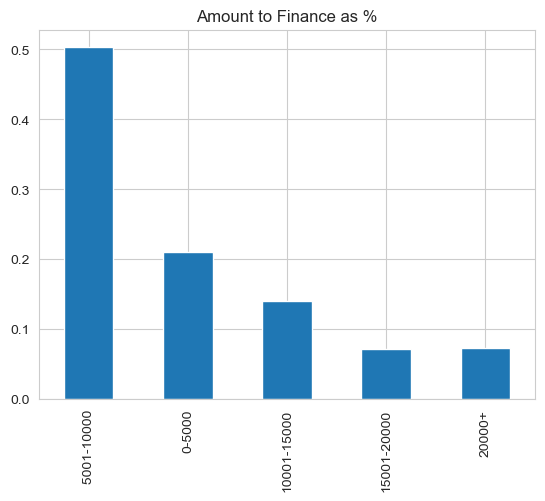

In [113]:
from numpy import float64

finance_ranges = {
    5000: "1000-5000",
    5000: "0-5000",
    5000: "0-5000",
    10000: " 5001-10000",
    15000: "10001-15000",
    20000: "15001-20000",
}


def map_amount_to_finance_buckets(amount):
    for limit, bucket in finance_ranges.items():
        if float64(amount) <= limit:
            return bucket
    return "20000+"


affiliate_leads["amounttofinance"].map(map_amount_to_finance_buckets).value_counts(
    normalize=True
).sort_index().plot(kind="bar", title="Amount to Finance as %")
affiliate_leads["amount_to_finance_buckets"] = affiliate_leads["amounttofinance"].map(
    map_amount_to_finance_buckets
)

AttributeError: Rectangle.set() got an unexpected keyword argument 'col'

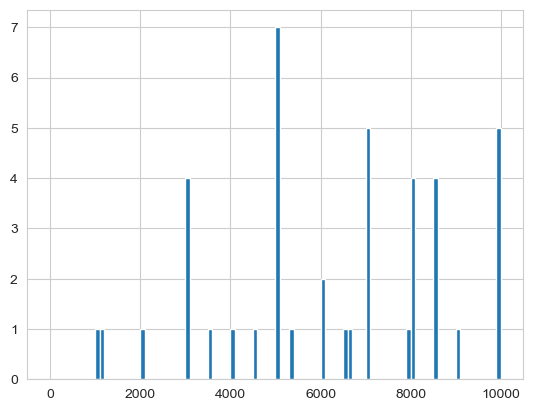

In [140]:
affiliate_leads[0:100].hist(column= "amounttofinance", bins = 100, range = (0, 10000), grid = True, col = "utmsource")

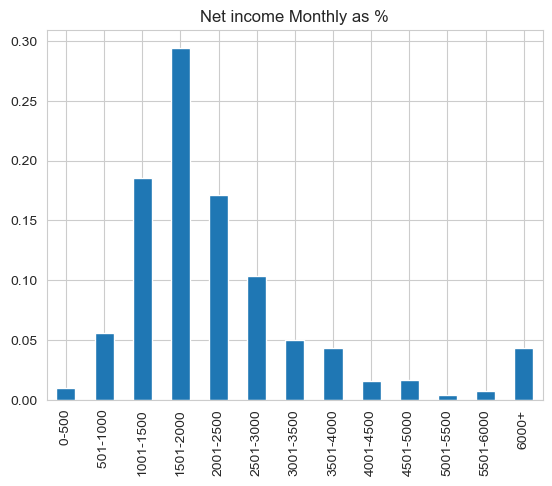

In [8]:
from numpy import float64

income_ranges = {
    500: " 0-500",
    1000: " 501-1000",
    1500: "1001-1500",
    2000: "1501-2000",
    2500: "2001-2500",
    3000: "2501-3000",
    3500: "3001-3500",
    4000: "3501-4000",
    4500: "4001-4500",
    5000: "4501-5000",
    5500: "5001-5500",
    6000: "5501-6000",
}


def map_income_buckets(amount):
    for limit, bucket in income_ranges.items():
        if float64(amount) <= limit:
            return bucket
    return "6000+"


# visualize income buckets
affiliate_leads["netmonthlyincome"].map(map_income_buckets).value_counts(
    normalize=True
).sort_index().plot(kind="bar", title="Net income Monthly as %")
affiliate_leads["net_monthly_income_buckets"] = affiliate_leads["netmonthlyincome"].map(
    map_income_buckets
)

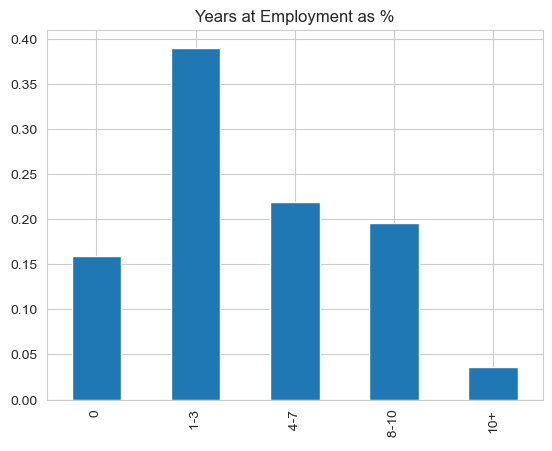

In [9]:
from numpy import float64

employment_ranges = {0: " 0", 3: " 1-3", 7: " 4-7", 10: " 8-10"}


def map_employment_buckets(amount):
    for limit, bucket in employment_ranges.items():
        if float64(amount) <= limit:
            return bucket
    return "10+"


# visualize income buckets
affiliate_leads["yearsatemployment"].map(map_employment_buckets).value_counts(
    normalize=True
).sort_index().plot(kind="bar", title="Years at Employment as %")
affiliate_leads["years_at_employment_buckets"] = affiliate_leads[
    "yearsatemployment"
].map(map_employment_buckets)

<Axes: title={'center': 'Months at Employment as %'}>

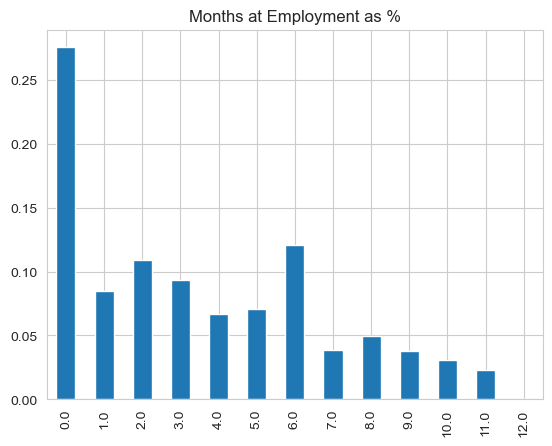

In [10]:
affiliate_leads[affiliate_leads["monthsatemployment"] > 12] = 0
affiliate_leads["monthsatemployment"].value_counts(normalize=True).sort_index().plot(
    kind="bar", title="Months at Employment as %"
)

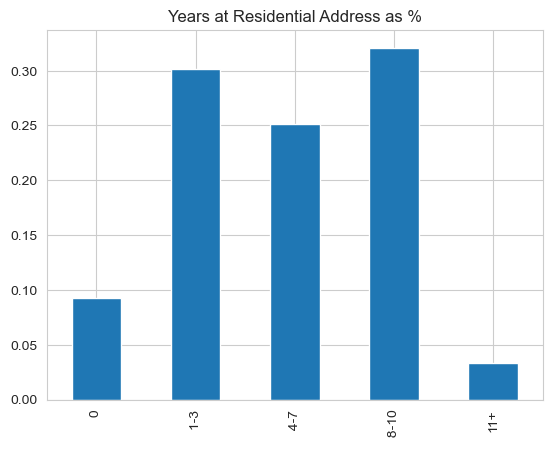

In [11]:
from numpy import float64

years_at_resident = {0: " 0", 3: " 1-3", 7: " 4-7", 10: " 8-10"}


def map_years_at_home(amount):
    for limit, bucket in years_at_resident.items():
        if float64(amount) <= limit:
            return bucket
    return "11+"


affiliate_leads["yearsatresidentialaddress"].map(map_years_at_home).value_counts(
    normalize=True
).sort_index().plot(kind="bar", title="Years at Residential Address as %")
affiliate_leads["years_at_residential_address_buckets"] = affiliate_leads[
    "yearsatresidentialaddress"
].map(map_years_at_home)

<Axes: title={'center': 'Years at Residential Address'}>

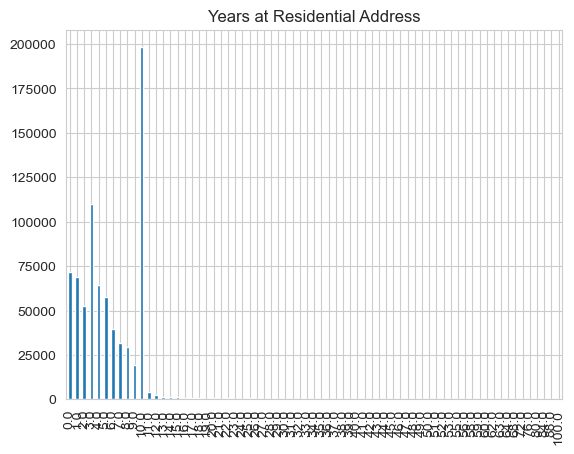

In [12]:
affiliate_leads["yearsatresidentialaddress"].value_counts().sort_index().plot(
    kind="bar", title="Years at Residential Address"
)

<Axes: title={'center': 'Months at Residential Address as %'}>

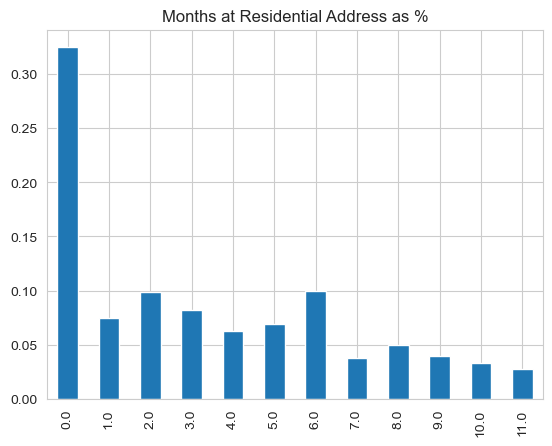

In [13]:
affiliate_leads[affiliate_leads["monthsatresidentialaddress"] >= 12] = 0
affiliate_leads["monthsatresidentialaddress"].value_counts(
    normalize=True
).sort_index().plot(kind="bar", title="Months at Residential Address as %")

In [14]:
affiliate_leads.columns

Index(['loanapplicationid', 'cashdeposit', 'amounttofinance',
       'maritalstatusid', 'emailaddress', 'drivinglicencetypeid', 'titleid',
       'netmonthlyincome', 'employmentstatusname', 'employmentstatusid',
       'yearsatemployment', 'monthsatemployment', 'occupation',
       'employmentpostcode', 'residentialpostcode',
       'yearsatresidentialaddress', 'monthsatresidentialaddress',
       'residentialstatusname', 'utmsource', 'utmmedium', 'utmterm',
       'utmcontent', 'utmcampaign', 'utmtype', 'mkwid', 'vehicletypeid',
       'applicationdate', 'ispromoemail', 'ispromosms', 'ispromotelephone',
       'isshareinfo', 'iscomplete', 'submittedby', 'affiliateuserid',
       'urlreferrer', 'vehicleid', 'datefirstregistered', 'make',
       'glassadjustedprice', 'mileage', 'fueltype', 'transmission', 'colour',
       'iswrittenagreement', 'isdocout', 'isapproval', 'unnamed: 46',
       'unnamed: 47', 'unnamed: 48', 'amount_to_finance_buckets',
       'net_monthly_income_buckets', '

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

"""
# Example usage
    def plot_correlations(df, target):
        # Calculate correlation matrix
        corr_matrix = df.corr()

        # Plot correlation matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
        plt.title("Correlation Matrix")

        # Plot correlations with target variable
        plt.figure(figsize=(10, 6))
        sns.barplot(x=corr_matrix[target].index, y=corr_matrix[target].values)
        plt.xticks(rotation=90)
        plt.title("Correlations with Target")

        plt.show()
    df = affiliate_leads  # Replace "your_dataset.csv" with your actual dataset file path
    target_variable = "IsApproval"  # Replace "target_column_name" with the name of your target column

    plot_correlations(df, target_variable)
"""

'\n# Example usage\n    def plot_correlations(df, target):\n        # Calculate correlation matrix\n        corr_matrix = df.corr()\n    \n        # Plot correlation matrix\n        plt.figure(figsize=(10, 8))\n        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")\n        plt.title("Correlation Matrix")\n    \n        # Plot correlations with target variable\n        plt.figure(figsize=(10, 6))\n        sns.barplot(x=corr_matrix[target].index, y=corr_matrix[target].values)\n        plt.xticks(rotation=90)\n        plt.title("Correlations with Target")\n    \n        plt.show()\n    df = affiliate_leads  # Replace "your_dataset.csv" with your actual dataset file path\n    target_variable = "IsApproval"  # Replace "target_column_name" with the name of your target column\n    \n    plot_correlations(df, target_variable)\n'

C:\Users\Colin.Hanley\AppData\Local\Temp\ipykernel_11524\196985993.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = affiliate_leads.corr("pearson")


Text(0.5, 1.0, 'Correlation Matrix')

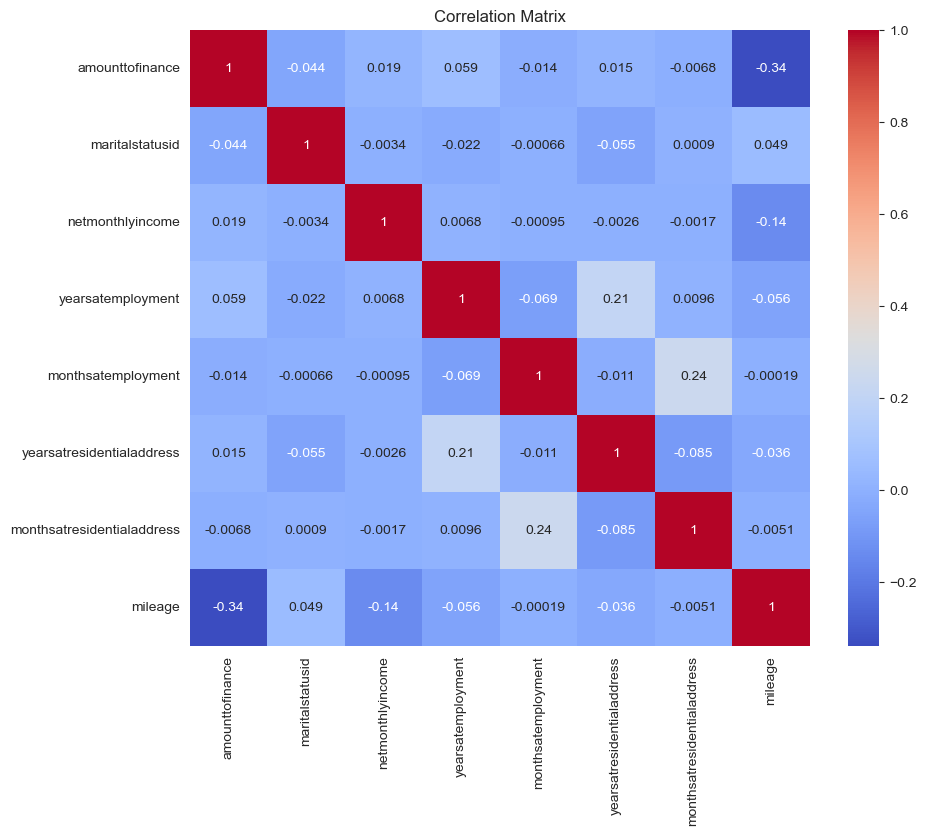

In [18]:
corr_matrix = affiliate_leads.corr("pearson")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

In [19]:
affiliate_leads.isapproval.describe

<bound method NDFrame.describe of 0         False
1          True
2          True
3         False
4          True
          ...  
769130    False
769131    False
769132    False
769133    False
769134    False
Name: isapproval, Length: 769135, dtype: object>

In [20]:
# change the dtype of isapproval to int, change na to 0
affiliate_leads["isapproval"] = affiliate_leads["isapproval"].fillna(0).astype(int)

In [21]:
affiliate_leads["isapproval"].describe()

count    769135.000000
mean          0.505203
std           0.499973
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: isapproval, dtype: float64

<Axes: title={'center': 'Net income Monthly as %'}, xlabel='net_monthly_income_buckets'>

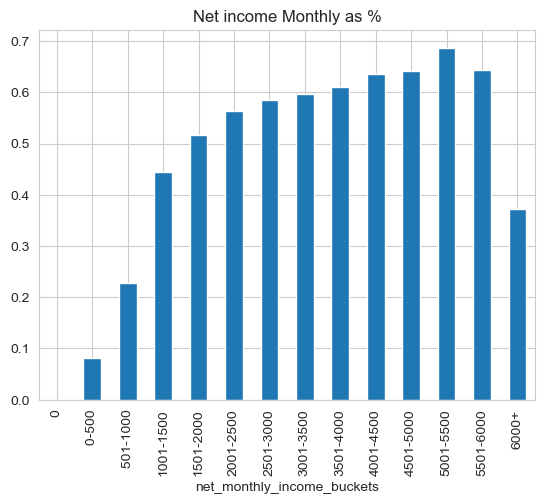

In [22]:
# plot monthly income bucket to isapproval
affiliate_leads.groupby("net_monthly_income_buckets")["isapproval"].mean().plot(
    kind="bar", title="Net income Monthly as %"
)

In [23]:
# calculate monthly income buckets to acceptance rate
affiliate_leads.groupby("net_monthly_income_buckets")["isapproval"].mean()

net_monthly_income_buckets
0            0.000000
 0-500       0.081481
 501-1000    0.227999
1001-1500    0.443562
1501-2000    0.517424
2001-2500    0.563309
2501-3000    0.584878
3001-3500    0.595786
3501-4000    0.610755
4001-4500    0.635759
4501-5000    0.642460
5001-5500    0.687058
5501-6000    0.644376
6000+        0.371416
Name: isapproval, dtype: float64

In [24]:
# create a new dataframe with the following columns dropped: loanapplicationid, emailaddress, occupation, unnamed: 46, unnamed: 47, unnamed: 48
affiliate_leads_trimmed = affiliate_leads.drop(
    [
        "loanapplicationid",
        "emailaddress",
        "occupation",
        "unnamed: 46",
        "unnamed: 47",
        "unnamed: 48",
    ],
    axis=1,
)

In [25]:
def find_unique_values(df, uniqueness_threshold=6):
    suitable_columns = {}

    for col in df.columns:
        if df[col].dtype in ["object", "category"]:
            if df[col].nunique() / df[col].count() * 100 < uniqueness_threshold:
                suitable_columns[col] = str("category")

        elif df[col].dtype in ["int64", "float64"]:
            suitable_columns[col] = df[col].dtype

    return suitable_columns


def transform_dataset(df, type_dict):
    transformed_df = df.copy()

    columns_to_drop = set(transformed_df.columns) - set(type_dict.keys())
    transformed_df.drop(columns=columns_to_drop, inplace=True)

    for col, col_type in type_dict.items():
        transformed_df[col] = transformed_df[col].astype(col_type)

    return transformed_df


def drop_columns_with_high_nan(df, nan_threshold=0.75):
    nan_percentages = df.isna().mean()
    columns_to_drop = nan_percentages[nan_percentages > nan_threshold].index
    df_dropped = df.drop(columns=columns_to_drop)
    return df_dropped


type_dict = find_unique_values(affiliate_leads)
transformed_df = transform_dataset(affiliate_leads, type_dict)
transformed_df = drop_columns_with_high_nan(transformed_df)

In [26]:
# create me a very unregularlised xgboost model to predict acceptance rate using all of the available columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

X = transformed_df  #
y_df = dataset_manager.load_datasets("affiliate_suppression_May-23_6months_eda")
y = (
    y_df["affiliate_suppression_May-23_6months_eda"]["IsApproval"]
    .map({True: 1, False: 0})
    .fillna(0)
    .astype(int)
)

# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and fit model

model = XGBClassifier(
    tree_method="gpu_hist",
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=4,
    subsample=0.6,
    colsample_bytree=0.6,
    reg_alpha=1,
    reg_lambda=1,
    n_jobs=-1,
    enable_categorical=True,
)
model.fit(X_train, y_train)

# Evaluate model
print("Training score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))

pulling dataset affiliate_suppression_May-23_6months_eda
Training score: 0.7278566181489595
Test score: 0.7241966624844793


In [27]:
feature_importance = pd.DataFrame(
    model.feature_importances_, index=X_train.columns, columns=["importance"]
).sort_values("importance", ascending=False)

In [28]:
feature_importance

,importance
iscomplete,0.240785
drivinglicencetypeid,0.129447
residentialstatusname,0.104822
isdocout,0.081506
employmentstatusid,0.051110
submittedby,0.050082
iswrittenagreement,0.045702
employmentstatusname,0.043934
netmonthlyincome,0.043049
utmcampaign,0.035106


In [29]:
affiliate_leads

,loanapplicationid,cashdeposit,amounttofinance,maritalstatusid,emailaddress,drivinglicencetypeid,titleid,netmonthlyincome,employmentstatusname,employmentstatusid,...,iswrittenagreement,isdocout,isapproval,unnamed: 46,unnamed: 47,unnamed: 48,amount_to_finance_buckets,net_monthly_income_buckets,years_at_employment_buckets,years_at_residential_address_buckets
0,13386755,NaN,11500.0,25.0,ileanamihali25@gmail.com,35.0,4.0,2400.0,Employed Full Time,1.0,...,False,False,0,NaN,NaN,NaN,10001-15000,2001-2500,1-3,1-3
1,13386756,NaN,14000.0,24.0,benjmatthews98@gmail.com,35.0,1.0,1800.0,Employed Full Time,1.0,...,False,False,1,NaN,NaN,NaN,10001-15000,1501-2000,0,8-10
2,13386757,NaN,14000.0,24.0,jamilraja94@googlemail.com,35.0,1.0,4000.0,Employed Full Time,1.0,...,False,False,1,NaN,NaN,NaN,10001-15000,3501-4000,1-3,1-3
3,13386758,NaN,8500.0,28.0,suttonangela@yahoo.com,35.0,2.0,1200.0,Not Employed,5.0,...,False,False,0,NaN,NaN,NaN,5001-10000,1001-1500,0,8-10
4,13386759,NaN,8500.0,23.0,mpritch85@outlook.com,35.0,2.0,1250.0,Employed Full Time,1.0,...,False,False,1,NaN,NaN,NaN,5001-10000,1001-1500,8-10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769130,13555922,NaN,10000.0,NaN,adin.p1980@gmail.com,NaN,3.0,NaN,NaN,NaN,...,False,False,0,NaN,NaN,NaN,5001-10000,6000+,10+,11+
769131,12911025,NaN,6500.0,NaN,chris119944@icloud.com,NaN,1.0,NaN,NaN,NaN,...,False,False,0,NaN,NaN,NaN,5001-10000,6000+,10+,1-3
769132,13245628,NaN,10000.0,24.0,brendanoconnor@live.co.uk,NaN,1.0,NaN,NaN,NaN,...,False,False,0,NaN,NaN,NaN,5001-10000,6000+,10+,1-3
769133,13029376,NaN,5000.0,NaN,naida_hussain@icloud.com,NaN,2.0,NaN,NaN,NaN,...,False,False,0,NaN,NaN,NaN,0-5000,6000+,10+,4-7


,loanapplicationid,cashdeposit,amounttofinance,maritalstatusid,emailaddress,drivinglicencetypeid,titleid,netmonthlyincome,employmentstatusname,employmentstatusid,...,iswrittenagreement,isdocout,isapproval,unnamed: 46,unnamed: 47,unnamed: 48,amount_to_finance_buckets,net_monthly_income_buckets,years_at_employment_buckets,years_at_residential_address_buckets
0,13386755,NaN,11500.0,25.0,ileanamihali25@gmail.com,35.0,4.0,2400.0,Employed Full Time,1.0,...,False,False,0,NaN,NaN,NaN,10001-15000,2001-2500,1-3,1-3
1,13386756,NaN,14000.0,24.0,benjmatthews98@gmail.com,35.0,1.0,1800.0,Employed Full Time,1.0,...,False,False,1,NaN,NaN,NaN,10001-15000,1501-2000,0,8-10
2,13386757,NaN,14000.0,24.0,jamilraja94@googlemail.com,35.0,1.0,4000.0,Employed Full Time,1.0,...,False,False,1,NaN,NaN,NaN,10001-15000,3501-4000,1-3,1-3
3,13386758,NaN,8500.0,28.0,suttonangela@yahoo.com,35.0,2.0,1200.0,Not Employed,5.0,...,False,False,0,NaN,NaN,NaN,5001-10000,1001-1500,0,8-10
4,13386759,NaN,8500.0,23.0,mpritch85@outlook.com,35.0,2.0,1250.0,Employed Full Time,1.0,...,False,False,1,NaN,NaN,NaN,5001-10000,1001-1500,8-10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769130,13555922,NaN,10000.0,NaN,adin.p1980@gmail.com,NaN,3.0,NaN,NaN,NaN,...,False,False,0,NaN,NaN,NaN,5001-10000,6000+,10+,11+
769131,12911025,NaN,6500.0,NaN,chris119944@icloud.com,NaN,1.0,NaN,NaN,NaN,...,False,False,0,NaN,NaN,NaN,5001-10000,6000+,10+,1-3
769132,13245628,NaN,10000.0,24.0,brendanoconnor@live.co.uk,NaN,1.0,NaN,NaN,NaN,...,False,False,0,NaN,NaN,NaN,5001-10000,6000+,10+,1-3
769133,13029376,NaN,5000.0,NaN,naida_hussain@icloud.com,NaN,2.0,NaN,NaN,NaN,...,False,False,0,NaN,NaN,NaN,0-5000,6000+,10+,4-7


In [35]:
affiliate_leads

,loanapplicationid,cashdeposit,amounttofinance,maritalstatusid,emailaddress,drivinglicencetypeid,titleid,netmonthlyincome,employmentstatusname,employmentstatusid,...,mileage,fueltype,transmission,colour,iswrittenagreement,isdocout,isapproval,unnamed: 46,unnamed: 47,unnamed: 48
0,13386755,NaN,11500.0,25.0,ileanamihali25@gmail.com,35.0,4.0,2400.0,Employed Full Time,1.0,...,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN
1,13386756,NaN,14000.0,24.0,benjmatthews98@gmail.com,35.0,1.0,1800.0,Employed Full Time,1.0,...,NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN
2,13386757,NaN,14000.0,24.0,jamilraja94@googlemail.com,35.0,1.0,4000.0,Employed Full Time,1.0,...,NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN
3,13386758,NaN,8500.0,28.0,suttonangela@yahoo.com,35.0,2.0,1200.0,Not Employed,5.0,...,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN
4,13386759,NaN,8500.0,23.0,mpritch85@outlook.com,35.0,2.0,1250.0,Employed Full Time,1.0,...,NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769130,13555922,NaN,10000.0,NaN,adin.p1980@gmail.com,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN
769131,12911025,NaN,6500.0,NaN,chris119944@icloud.com,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN
769132,13245628,NaN,10000.0,24.0,brendanoconnor@live.co.uk,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN
769133,13029376,NaN,5000.0,NaN,naida_hussain@icloud.com,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN


In [36]:
affiliate_leads["utmsource"].value_counts()

google                       249999
ckdirect                     137318
facebook                      57984
crm_marketing                 46959
reapply                       28008
                              ...  
go.exospecial.com                 1
braze.lightning.force.com         1
12                                1
affiliatewindow                   1
Car Credible                      1
Name: utmsource, Length: 182, dtype: int64

In [40]:
sandhurst_leads = affiliate_leads[affiliate_leads["utmsource"] == "Sandhurst Associates"]
sandhurst_leads["datetime"] = pd.to_datetime(sandhurst_leads["applicationdate"], infer_datetime_format=True, utc=True, errors="coerce")\
sandhurst_leads["year"] = sandhurst_leads["datetime"].dt.year

In [85]:
print(
    f'% of Sandhurst applications being accepted = {round(sandhurst_leads.groupby("year")["isapproval"].mean().values[0],2)*100}%'
)

% of Sandhurst applications being accepted = 78.0%


In [110]:
print(
    f'% of Sandhurst applications being is doc out = {round(sandhurst_leads.groupby("year")["isdocout"].mean().values[0],2)*100}%'
)

% of Sandhurst applications being is doc out = 3.0%


In [111]:
print(
    f'% of Sandhurst applications being written agreement = {round(sandhurst_leads["iswrittenagreement"].apply(lambda x: 1 if str.lower(str(x)) == "true" else 0 ).mean(),2)*100}%'
)

% of Sandhurst applications being written agreement = 2.0%


In [112]:
sandhurst_leads

,loanapplicationid,cashdeposit,amounttofinance,maritalstatusid,emailaddress,drivinglicencetypeid,titleid,netmonthlyincome,employmentstatusname,employmentstatusid,...,transmission,colour,iswrittenagreement,isdocout,isapproval,unnamed: 46,unnamed: 47,unnamed: 48,datetime,year
2,13386757,NaN,14000.0,24.0,jamilraja94@googlemail.com,35.0,1.0,4000.0,Employed Full Time,1.0,...,NaN,NaN,False,False,True,NaN,NaN,NaN,2023-03-22 18:53:00+00:00,2023
31,13386786,NaN,7000.0,23.0,mcexplosive@yahoo.com,35.0,2.0,1500.0,Employed Full Time,1.0,...,NaN,NaN,False,False,True,NaN,NaN,NaN,2023-03-22 18:57:00+00:00,2023
88,13386845,NaN,7900.0,23.0,barleahjohnson@hotmail.com,35.0,1.0,1900.0,Employed Full Time,1.0,...,NaN,NaN,False,False,True,NaN,NaN,NaN,2023-03-22 19:03:00+00:00,2023
131,13386888,NaN,5000.0,25.0,juttylou@hotmail.com,35.0,4.0,1700.0,Employed Full Time,1.0,...,NaN,NaN,False,False,True,NaN,NaN,NaN,2023-03-22 19:09:00+00:00,2023
150,13387056,NaN,12000.0,23.0,mallinderraymond@gmail.com,35.0,1.0,1996.0,Employed Full Time,1.0,...,NaN,NaN,False,False,True,NaN,NaN,NaN,2023-03-22 19:33:00+00:00,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767551,13577033,NaN,5000.0,24.0,e.leadbeater@googlemail.com,35.0,4.0,1500.0,Employed Full Time,1.0,...,NaN,NaN,False,False,True,NaN,NaN,NaN,2023-05-02 20:13:00+00:00,2023
767582,13577065,NaN,13000.0,23.0,will@oxenfoord.co.uk,35.0,1.0,3625.0,Employed Full Time,1.0,...,NaN,NaN,False,False,True,NaN,NaN,NaN,2023-05-02 20:18:00+00:00,2023
767587,13577070,NaN,6000.0,24.0,darrencowley23@gmail.com,35.0,1.0,2000.0,Employed Full Time,1.0,...,NaN,NaN,False,False,True,NaN,NaN,NaN,2023-05-02 20:18:00+00:00,2023
767653,13577288,NaN,6900.0,24.0,craigmcewan.93@gmail.com,35.0,1.0,1900.0,Employed Full Time,1.0,...,NaN,NaN,False,False,True,NaN,NaN,NaN,2023-05-02 20:56:00+00:00,2023
